In [136]:
import os
import cv2
import inspect
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(currentdir)
os.chdir(r'/RG/rg-tal/orlev/Face-Recognition-Of-Masked-Faces')

from config_file import *
from helpers import get_model, read_images, get_1id_pose, resize_image, img_output_bbox, project_3d,head3d_z_dist
from create_masks import masks_templates, load_3dmm, get_frontal, morphological_op

In [9]:
img_src = '/RG/rg-tal/orlev/datasets/original_ds/lfw/Pierre_Gagnon/Pierre_Gagnon_0001.jpg'

masks_to_create = masks_templates(ALL_MASKS)


# Get img2pose model
model, transform = get_model()
img = plt.imread(img_src, 1)
results = model.predict([transform(img)])[0]
pose, bbox = get_1id_pose(results, img, 0)

r_img, scale_factor = resize_image(img, bbox)

# output image selected area
output_bbox = img_output_bbox(img, bbox, 0.25, True)

# project 3D face according to pose
df_3dh = project_3d(r_img, pose)
h3d2i = head3d_z_dist(r_img, df_3dh)
mask_name = 'sunglassesmask'#masks_to_create[0]
frontal_mask, frontal_add_mask, frontal_rest = get_frontal(r_img, df_3dh, h3d2i, mask_name, scale_factor)

Model will use 1 GPUs!


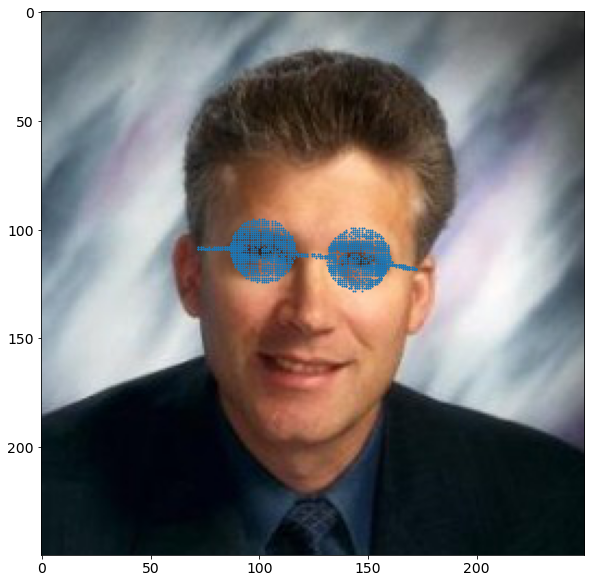

In [206]:
fig1 = plt.figure(figsize=(10, 10))
img = plt.imread(img_src, 1)
plt.imshow(img)
plt.scatter(frontal_mask[:,0],frontal_mask[:,1], s=1,color='C0')
plt.scatter(frontal_add_mask[:,0],frontal_add_mask[:,1], s=1,color='C0')
plt.tick_params(labelsize=14)

# Zoom

In [239]:
factor = 543/250
LEFT_LIMIT_X = int(55 * factor)
LEFT_LIMIT_Y = int(50 * factor)
RIGHT_LIMIT_X = int(185 * factor)
RIGHT_LIMIT_Y = int(200 * factor)
face_color = 'peru'
TMP_IMAGE = r'/RG/rg-tal/orlev/Face-Recognition-Of-Masked-Faces/notebooks/tmp.jpg'

In [233]:
limited_mask_x = frontal_mask[:,0][(LEFT_LIMIT_X < frontal_mask[:,0]) & (frontal_mask[:,0] < RIGHT_LIMIT_X)]
limited_mask_y = frontal_mask[:,1][(LEFT_LIMIT_Y < frontal_mask[:,1]) & (frontal_mask[:,1] < RIGHT_LIMIT_Y)]

limited_add_mask_x = frontal_add_mask[:,0][(LEFT_LIMIT_X < frontal_add_mask[:,0]) & (frontal_add_mask[:,0] < RIGHT_LIMIT_X)]
limited_add_mask_y = frontal_add_mask[:,1][(LEFT_LIMIT_Y < frontal_add_mask[:,1]) & (frontal_add_mask[:,1] < RIGHT_LIMIT_Y)]

<Figure size 720x720 with 0 Axes>

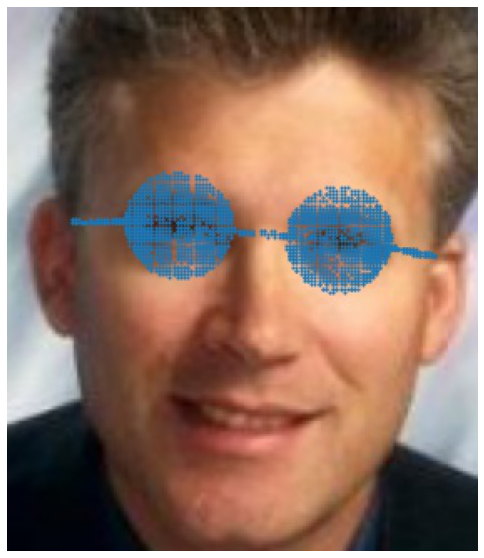

In [242]:
fig1 = plt.figure(figsize=(10, 10))

plt.imshow(img)
plt.scatter(frontal_mask[:,0],frontal_mask[:,1], s=1,color='C0')
plt.scatter(frontal_add_mask[:,0],frontal_add_mask[:,1], s=1,color='C0')
plt.axis('off')

# plt.tick_params(labelsize=14)
plt.savefig(TMP_IMAGE,bbox_inches='tight',pad_inches = 0,transparent=True)
plt.clf()

fig1 = plt.figure(figsize=(10, 10))
img_tmp1 = plt.imread(r'/RG/rg-tal/orlev/Face-Recognition-Of-Masked-Faces/notebooks/tmp.jpg')
plt.axis('off')
plt.imshow(img_tmp1[ LEFT_LIMIT_Y:RIGHT_LIMIT_Y,LEFT_LIMIT_X:RIGHT_LIMIT_X,:])
os.remove(TMP_IMAGE)

# morphological 

In [248]:
mask_x, mask_y, mask_on_image = morphological_op(True, frontal_mask, img,
                                                 config[mask_name].mask_filter_size, MASK_RIGHT_POINT,
                                                 True, config[mask_name].main_mask_components_number)

_, _, mask_add_on_image = morphological_op(config[mask_name].mask_add_front_points_calc,
                                                         frontal_add_mask, img, ADD_LEFT_POINT, ADD_RIGHT_POINT,
                                                         False, 0, cv2.MORPH_DILATE)

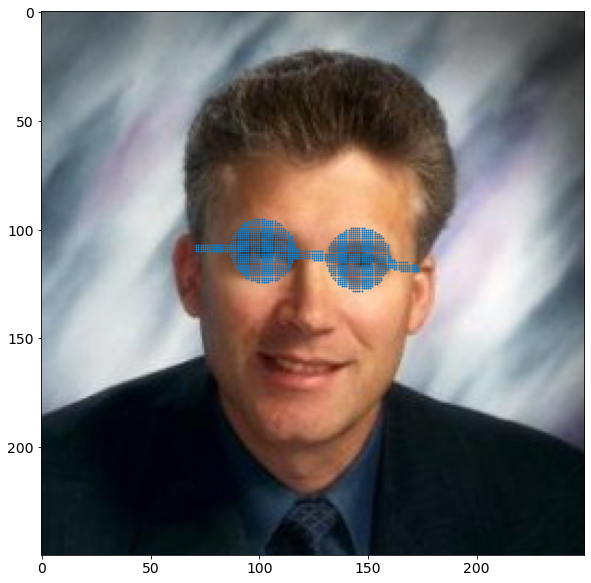

In [244]:
yy, xx = np.where(mask_add_on_image == 1)
plt_1 = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.scatter(mask_x,mask_y, s=1,color='C0')
plt.scatter(xx,yy, s=1,color='C0')
plt.tick_params(labelsize=14)

# Morphological zoom

<Figure size 720x720 with 0 Axes>

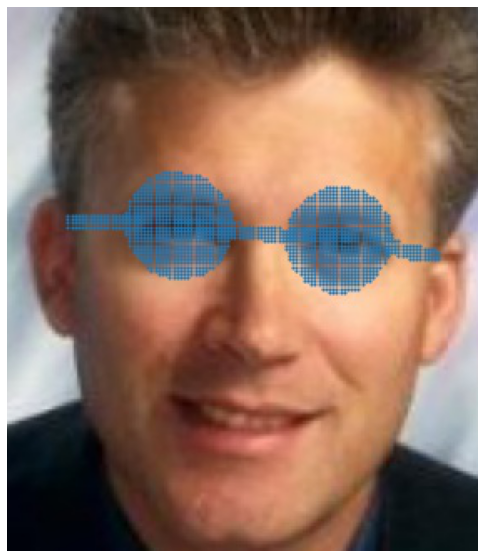

In [247]:
yy, xx = np.where(mask_add_on_image == 1)
plt_1 = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.scatter(mask_x,mask_y, s=1,color='C0')
plt.scatter(xx,yy, s=1,color='C0')
plt.axis('off')

# plt.tick_params(labelsize=14)
plt.savefig(TMP_IMAGE,bbox_inches='tight',pad_inches = 0,transparent=True)
plt.clf()

fig1 = plt.figure(figsize=(10, 10))
img_tmp1 = plt.imread(TMP_IMAGE)
plt.axis('off')
plt.imshow(img_tmp1[ LEFT_LIMIT_Y:RIGHT_LIMIT_Y,LEFT_LIMIT_X:RIGHT_LIMIT_X,:])
os.remove(TMP_IMAGE)

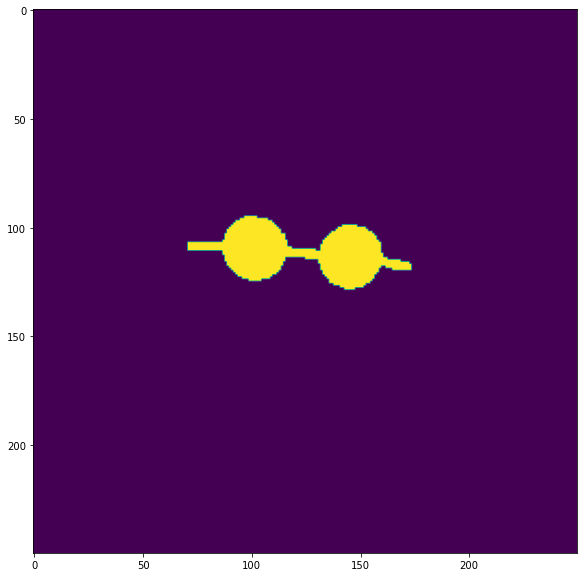

In [258]:
yy1, xx1 = np.where(mask_on_image == 1)
yy2, xx2 = np.where(mask_add_on_image == 1)
fig2 = plt.figure(figsize=(10, 10))
mask_on_image2=mask_on_image.copy()
mask_on_image2[yy2, xx2] = 1
plt.imshow(mask_on_image2)


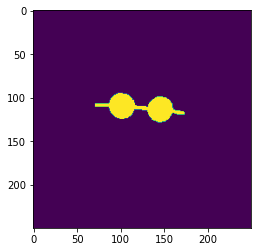